In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')
df.head()

,T,TM,Tm,H,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,59,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46,6.9,3.3,5.4,223.208333


In [3]:
def transform_float(dataframe):
    #Transforming my columns to float datatype
    cols = list(dataframe.columns)
    for col in cols:
        dataframe[col] = pd.to_numeric(dataframe[col], downcast='float',errors='coerce') 
    return dataframe

In [4]:
df = transform_float(df)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 0 to 1126
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1103 non-null   float32
 1   TM      1103 non-null   float32
 2   Tm      1103 non-null   float32
 3   H       1103 non-null   float32
 4   VV      1103 non-null   float32
 5   V       1103 non-null   float32
 6   VM      1103 non-null   float32
 7   PM 2.5  1103 non-null   float32
dtypes: float32(8)
memory usage: 43.1 KB


In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [9]:
lr = LinearRegression()
mse = cross_val_score(lr,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-4580.10439453125


### Ridge Regression for penalising the steepness of slope by adding lamda x slope**2

In [12]:
ridge = Ridge()
params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,40,50]}
ridge_reg = GridSearchCV(ridge,params,cv=5,scoring='neg_mean_squared_error')
ridge_reg.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 40, 50]},
             scoring='neg_mean_squared_error')

In [13]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 50}
-4577.562158203125


### Lasso Regression penalises the features by adding lamda x |slope|

In [14]:
lasso = Lasso()
params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,40,50]}
lasso_reg = GridSearchCV(lasso,params,cv=5,scoring='neg_mean_squared_error')
lasso_reg.fit(X,y)

C:\Users\PETER\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1819609.875, tolerance: 574.5501098632812
  positive)
C:\Users\PETER\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2036465.0, tolerance: 650.0089111328125
  positive)
C:\Users\PETER\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1981504.25, tolerance: 598.8933715820312
  positive)
C:\Users\PETER\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 40, 50]},
             scoring='neg_mean_squared_error')

In [15]:
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 1}
-4563.63115234375


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=3)


## Model Evaluation

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [20]:
predict = lasso_reg.predict(X_test)

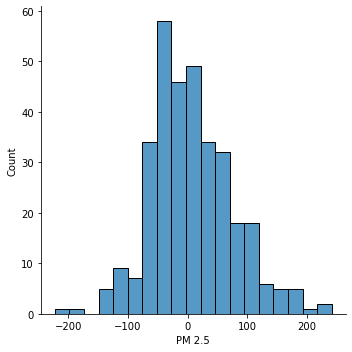

In [21]:
sns.displot(y_test-predict)

In [22]:
print('MAE:', mean_absolute_error(y_test,predict))
print('MSE:', mean_squared_error(y_test,predict))
print('RMSE:', np.sqrt(mean_squared_error(y_test,predict)))

MAE: 53.473705
MSE: 4805.264
RMSE: 69.320015


In [23]:
import joblib

In [24]:
joblib.dump(lasso_reg,'lasso_reg_model.pkl')

['lasso_reg_model.pkl']